# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [36]:
# Dependencies
import requests
import json
import pandas as pd
import random
from citipy import citipy
from random import uniform
import matplotlib.pyplot as plt
from api_keys import weather_api_key
from scipy.stats import linregress

## Generate Cities List

In [4]:
cities = []
while len(cities)< 550:
    x = uniform(-180,180)
    y = uniform(-90, 90)
    city_code = citipy.nearest_city(x, y)
    city_name = city_code.city_name
    if city_name not in cities:
        cities.append(city_name)

In [5]:
len(cities)

550

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# setting up empty lists to create DF
lat = []
lng = []
temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
df_cities=[]

for index, name in enumerate(cities):
    try:
        response = requests.get(query_url + name).json()
        df_cities.append(response["name"])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lat'])
        temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        print(f"{index+1}/{len(cities)}: Generating data for {name}")
    except:
        print(f"{index+1}/{len(cities)}: Data not found for {name}")

1/550: Data not found for barentsburg
2/550: Generating data for veraval
3/550: Generating data for hermanus
4/550: Generating data for qaanaaq
5/550: Generating data for ushuaia
6/550: Generating data for port-gentil
7/550: Generating data for sao domingos do maranhao
8/550: Generating data for meulaboh
9/550: Generating data for port alfred
10/550: Generating data for alberton
11/550: Generating data for port elizabeth
12/550: Generating data for porto velho
13/550: Generating data for bredasdorp
14/550: Generating data for busselton
15/550: Generating data for lupiro
16/550: Generating data for takoradi
17/550: Generating data for pisco
18/550: Generating data for nusaybin
19/550: Generating data for vardo
20/550: Data not found for belushya guba
21/550: Generating data for kutum
22/550: Generating data for canton
23/550: Generating data for rossano
24/550: Generating data for saint-augustin
25/550: Data not found for taolanaro
26/550: Generating data for longyearbyen
27/550: Data n

216/550: Generating data for demba
217/550: Generating data for tazovskiy
218/550: Generating data for tarare
219/550: Generating data for los llanos de aridane
220/550: Data not found for dinsor
221/550: Generating data for ajaccio
222/550: Generating data for santa maria
223/550: Generating data for bengkulu
224/550: Generating data for ancud
225/550: Generating data for ipora
226/550: Generating data for quatre cocos
227/550: Data not found for mutsamudu
228/550: Generating data for coquimbo
229/550: Generating data for ibra
230/550: Generating data for beyneu
231/550: Generating data for balkhash
232/550: Generating data for hambantota
233/550: Generating data for lebu
234/550: Generating data for klaksvik
235/550: Generating data for moussoro
236/550: Generating data for cuamba
237/550: Generating data for ous
238/550: Generating data for finsterwalde
239/550: Generating data for wageningen
240/550: Generating data for valdivia
241/550: Data not found for formoso do araguaia
242/5

431/550: Generating data for campos novos
432/550: Generating data for lagos
433/550: Generating data for santa isabel do rio negro
434/550: Generating data for sfantu gheorghe
435/550: Generating data for ginir
436/550: Data not found for atsiki
437/550: Generating data for rawson
438/550: Generating data for panaba
439/550: Generating data for tsiroanomandidy
440/550: Generating data for waterbury
441/550: Generating data for kavaratti
442/550: Generating data for semey
443/550: Data not found for stamsund
444/550: Generating data for rize
445/550: Generating data for yarada
446/550: Generating data for tirumala
447/550: Generating data for sinnai
448/550: Generating data for ponta delgada
449/550: Generating data for inirida
450/550: Generating data for rocha
451/550: Generating data for yanam
452/550: Generating data for mana
453/550: Generating data for buenos aires
454/550: Generating data for pachora
455/550: Generating data for batman
456/550: Generating data for geraldton
457/

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
weather_dict = {
    "City": df_cities,
    "Lat": lat,
    "Lng": lng,
    "Max temp": temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date
}
weather_data = pd.DataFrame(weather_dict)
weather_data.head(20)

,City,Lat,Lng,Max temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Verāval,20.90,20.90,28.39,71,14,4.76,IN,1601443628
1,Hermanus,-34.42,-34.42,8.89,92,40,0.95,ZA,1601443629
2,Qaanaaq,77.48,77.48,-10.33,78,0,3.14,GL,1601443629
3,Ushuaia,-54.80,-54.80,-1.00,100,75,7.70,AR,1601443629
4,Port-Gentil,-0.72,-0.72,24.90,76,100,4.12,GA,1601443629
5,São Domingos do Maranhão,-5.58,-5.58,23.55,79,79,1.71,BR,1601443630
6,Meulaboh,4.14,4.14,30.00,65,86,3.43,ID,1601443630
7,Port Alfred,-33.59,-33.59,13.73,69,9,4.10,ZA,1601443630
8,Alberton,46.82,46.82,18.92,87,21,8.14,CA,1601443630
9,Port Elizabeth,-33.92,-33.92,10.00,87,5,1.50,ZA,1601443630


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
humidity_weather_df = weather_data[weather_data["Humidity"]==100]
print(f"Removing {len(humidity_weather_df)} cities from the DF due to Humidity = 100")

Removing 34 cities from the DF due to Humidity = 100


In [54]:
clean_weather_df = weather_data[weather_data["Humidity"]<100]
clean_weather_df.head()
clean_weather_df.to_csv("../output_data/weather_data.csv",index = False, header = True)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [19]:
clean_weather_df.dtypes

City           object
Lat           float64
Lng           float64
Max temp      float64
Humidity        int64
Cloudiness      int64
Wind Speed    float64
Country        object
Date            int64
dtype: object

## Latitude vs. Temperature Plot
This graph is examining if there is a relationship between Latitude and Temperature. 

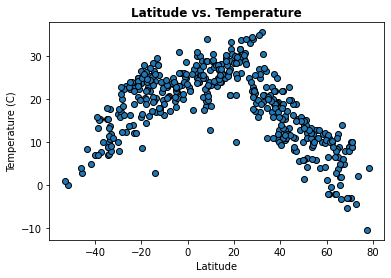

In [51]:
lat = clean_weather_df["Lat"].tolist()
temp = clean_weather_df["Max temp"].tolist()
plt.scatter(lat,temp, marker = "o", edgecolors ="black")
plt.xlabel("Latitude")
plt.ylabel("Temperature (C)")
plt.title("Latitude vs. Temperature", fontweight = "bold")
plt.savefig("../output_data/LatvsTemp.png")

## Latitude vs. Humidity Plot
This graph is examining if there is a relationship between Latitude and Humidity. 

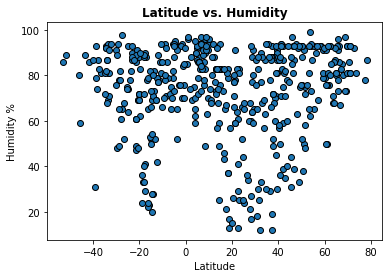

In [52]:
lat = clean_weather_df["Lat"].tolist()
humid = clean_weather_df["Humidity"].tolist()
plt.scatter(lat, humid, marker = "o", edgecolors ="black")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.title("Latitude vs. Humidity", fontweight = "bold")
plt.savefig("../output_data/LatvsHumidity.png")

## Latitude vs. Cloudiness Plot
This graph is examining if there is a relationship between Latitude and Cloudiness. 

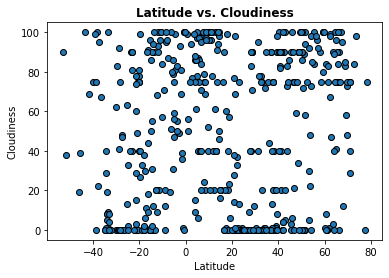

In [50]:
lat = clean_weather_df["Lat"].tolist()
cloud = clean_weather_df["Cloudiness"].tolist()
plt.scatter(lat, cloud, marker = "o", edgecolors ="black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs. Cloudiness", fontweight = "bold")
plt.savefig("../output_data/LatvsCloud.png")

## Latitude vs. Wind Speed Plot
This graph is examining if there is a relationship between Latitude and Wind Speed. 

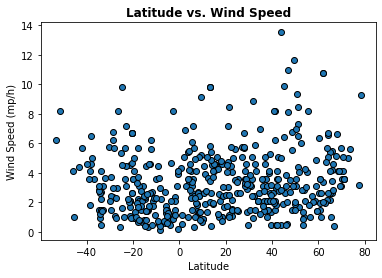

In [53]:
lat = clean_weather_df["Lat"].tolist()
wind = clean_weather_df["Wind Speed"].tolist()
plt.scatter(lat, wind, marker = "o", edgecolors ="black")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mp/h)")
plt.title("Latitude vs. Wind Speed", fontweight = "bold")
plt.savefig("../output_data/LatvsWind.png")

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [41]:
north_df = clean_weather_df[clean_weather_df['Lat']>0]
south_df = clean_weather_df[clean_weather_df['Lat']<0]

In [42]:
x_values = north_df["Lat"]
y_values = north_df["Max temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The equation is: {line_eq}")
print(f"The r-squared is: {rvalue**2}")

The equation is: y = -0.37x + 31.08
The r-squared is: 0.6795002915438157


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [43]:
x_values = south_df["Lat"]
y_values = south_df["Max temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The equation is: {line_eq}")
print(f"The r-squared is: {rvalue**2}")

The equation is: y = 0.4x + 27.11
The r-squared is: 0.5035463375436121


### Analysis
There seems to be a reasonable relationship between Latitude and the temperature. Particularly in the Northern hemisphere with the R-Squared value = 0.67, telling us quite a strong correlation exisits.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [44]:
x_values = north_df["Lat"]
y_values = north_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The equation is: {line_eq}")
print(f"The r-squared is: {rvalue**2}")

The equation is: y = 0.12x + 68.75
The r-squared is: 0.013309085764325592


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [45]:
x_values = south_df["Lat"]
y_values = south_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The equation is: {line_eq}")
print(f"The r-squared is: {rvalue**2}")

The equation is: y = -0.1x + 71.31
The r-squared is: 0.004371977158314947


### Analysis
There is little to no correlation between latitude and humidity in either hemisphere.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [47]:
x_values = north_df["Lat"]
y_values = north_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The equation is: {line_eq}")
print(f"The r-squared is: {rvalue**2}")

The equation is: y = 0.09x + 49.95
The r-squared is: 0.0020397998978499148


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [46]:
x_values = south_df["Lat"]
y_values = south_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The equation is: {line_eq}")
print(f"The r-squared is: {rvalue**2}")

The equation is: y = 0.7x + 59.32
The r-squared is: 0.04734228214607412


### Analysis
There is little to no correlation between latitude and cloudiness in either hemisphere.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [48]:
x_values = north_df["Lat"]
y_values = north_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The equation is: {line_eq}")
print(f"The r-squared is: {rvalue**2}")

The equation is: y = 0.01x + 3.15
The r-squared is: 0.010962355812993756


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [49]:
x_values = south_df["Lat"]
y_values = south_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The equation is: {line_eq}")
print(f"The r-squared is: {rvalue**2}")

The equation is: y = -0.05x + 1.82
The r-squared is: 0.09131758195018087


### Analysis
There is little to no correlation between latitude and wind speed in either hemisphere.